<h1 style="text-align: center;">Customer Insights and Campaign Effectiveness Analysis</h1>
<h3 style="text-align: center;">Muhammad Fa'iz Ismail</h3>

---

## **Section 1. Business Context**

**1.1 Context**

Data dari enam kampanye promosi yang dilakukan oleh supermarket X menunjukkan bahwa 27,3% pelanggan telah menerima setidaknya satu kampanye, yang menurut standar Genroe (berdasarkan laporan CustomerGauge) dianggap sebagai performa yang baik karena berada di atas 20%. Namun, tantangan utama terletak pada fakta bahwa setiap kampanye individual hanya mampu menjangkau kurang dari 20% pelanggan, padahal analisis menunjukkan adanya perbedaan signifikan dalam total pengeluaran antara pelanggan yang pernah menerima kampanye dibandingkan dengan yang belum pernah menerima, dengan pelanggan yang pernah menerima kampanye cenderung memiliki total pengeluaran yang lebih tinggi.

**1.2 Problem Statements**

Bagaimana cara meningkatkan tingkat responsivitas pelanggan terhadap kampanye promosi di Supermarket X hingga 20% dalam satu kali campaign

**1.3 Key Objective**

1. Identifikasi karakteristik pelanggan yang belum pernah terpapar oleh kampanye promosi.  
2. Tentukan jenis produk yang sering dibeli oleh pelanggan yang belum terlibat dalam kampanye promosi.  
3. Analisis saluran distribusi yang digunakan oleh pelanggan yang belum terpapar oleh kampanye promosi.

## **Section 2. Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

**2.1 General Information**

In [222]:
df=pd.read_csv(r'D:\Purwadhika\Module 2. Data Analysis\Capstone\supermarket_analysis\data\raw\Supermarket Customers.csv', sep='\t')

# Informasi dasar dataset
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()

# Statistik deskriptif untuk kolom numerik
df.describe()

# Statistik deskriptif untuk kolom kategorikal
df.describe(include='object')

Jumlah baris dan kolom: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


- Dataset memiliki 2240 baris dan 29 kolom.

**2.2 Feature Information**

Berikut adalah penjelasan data:  

**People**  
● ID: Identifikasi unik pelanggan  
● Year_Birth: Tahun kelahiran pelanggan  
● Education: Tingkat pendidikan pelanggan  
● Marital_Status: Status pernikahan pelanggan  
● Income: Pendapatan tahunan rumah tangga pelanggan  
● Kidhome: Jumlah anak di rumah pelanggan  
● Teenhome: Jumlah remaja di rumah pelanggan  
● Dt_Customer: Tanggal pelanggan mulai bergabung dengan perusahaan  
● Recency: Jumlah hari sejak pembelian terakhir pelanggan  
● Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak  

**Products**  
● MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir  
● MntFruits: Jumlah uang yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir  
● MntMeatProducts: Jumlah uang yang dihabiskan untuk produk daging dalam 2 tahun terakhir  
● MntFishProducts: Jumlah uang yang dihabiskan untuk produk ikan dalam 2 tahun terakhir  
● MntSweetProducts: Jumlah uang yang dihabiskan untuk produk manis dalam 2 tahun terakhir  
● MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir  

**Promotion**  
● NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon  
● AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak  
● AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak  
● AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak  
● AcceptedCmp4: 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak  
● AcceptedCmp5: 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak  
● Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak  

**Place**  
● NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan  
● NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog  
● NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko  
● NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir  

In [223]:
# Menambah Kolom Data 'umur'
current_year = 2014
df['Age'] = current_year - df['Year_Birth']

# Menambah Kolom Data 'total pengeluaran'
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Menambah Kolom Data 'pengelompokan umur'
def cat_age(age):
    if age <= 35:
        return "Young"
    elif 36 <= age <= 50:
        return "MiddleAge"
    elif 51 <= age <= 65:
        return "Mature"
    elif age >= 65:
        return "Senior"
    else:
        return None
df['category_age'] = df['Age'].apply(cat_age)

def cat_income(income, data_income):
    # Hitung kuartil
    q1 = data_income.quantile(0.25)
    q2 = data_income.quantile(0.50)
    q3 = data_income.quantile(0.75)
    
    if income < q1:
        return 'Very Low Income'
    elif income < q2:
        return 'Low Income'
    elif income < q3:
        return 'Medium Income'
    else:
        return 'High Income'

df['category_income'] = df['Income'].apply(lambda x: cat_income(x, df['Income']))

# Menambah Kolom Data 'berapa kali terekspos penawaran'
df['cmpcount'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] +df['Response']

# Menambah Kolom Data 'sudah atau belum terekspos penawaran'
df['cmpstatus'] = df['cmpcount'].apply(lambda x: 'Yes' if x > 0 else 'No')

**2.3 Statistics Summary**

In [224]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending,cmpcount
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196,605.798214,0.446875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,396.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,2525.000000,5.000000


,Education,Marital_Status,Dt_Customer,category_age,category_income,cmpstatus
count,2240,2240,2240,2240,2240,2240
unique,5,8,663,4,4,2
top,Graduation,Married,31-08-2012,MiddleAge,High Income,No
freq,1127,864,12,1019,578,1631


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [225]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Age                    0.000000
Total_Spending         0.000000
category

<Axes: >

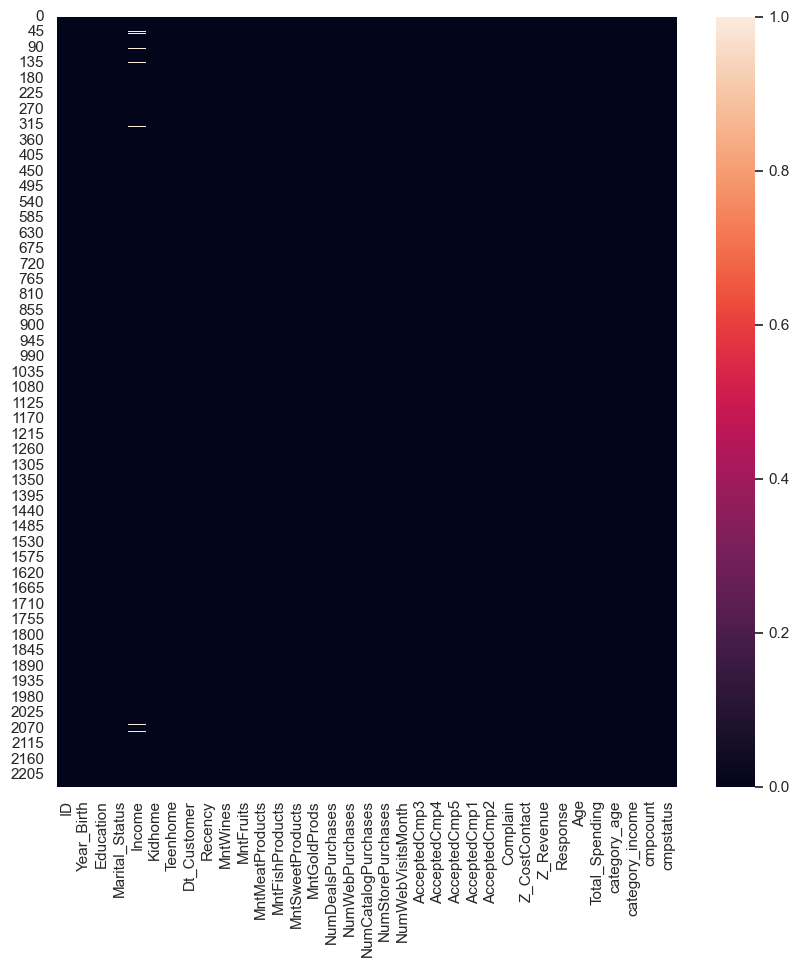

In [226]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Missing values hanya ditemukan pada kolom income. Penanganannya dapat dilakukan dengan:
- Menghapus baris karena data missingnya sangat kecil proporsinya hanya 
  1.07%

In [227]:
df = df.dropna()
df.shape

(2216, 35)

**3.2 Duplicated Values**

In [228]:
duplicates = df.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 0


**3.3 Incorrect Data Types**

In [229]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Total_Spending           int64
category_age            object
category

In [230]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
print(df['Dt_Customer_Year'])

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer_Year, Length: 2216, dtype: int32


**3.4 Inconsistent Values**

Melakukan perubahan nama kolom untuk konsistensi.

In [231]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [232]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

df.Education.unique()

array(['UnderGraduate', 'PhD', 'Master', 'High School'], dtype=object)

In [233]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [234]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

array(['Single', 'In Relationship'], dtype=object)

**3.5 Outlier Removal**

<Axes: xlabel='Age', ylabel='Count'>

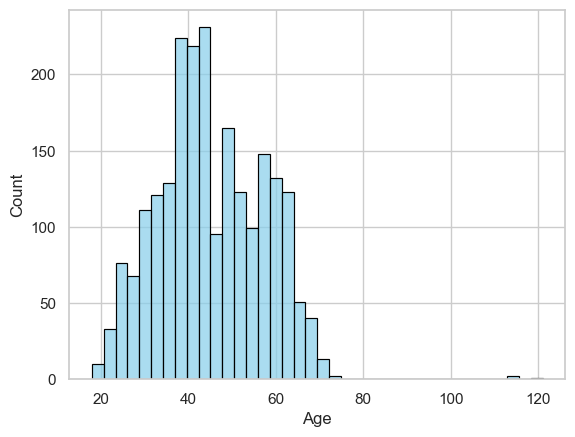

In [235]:
sns.histplot(data=df, 
            x='Age',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

<Axes: xlabel='Income', ylabel='Count'>

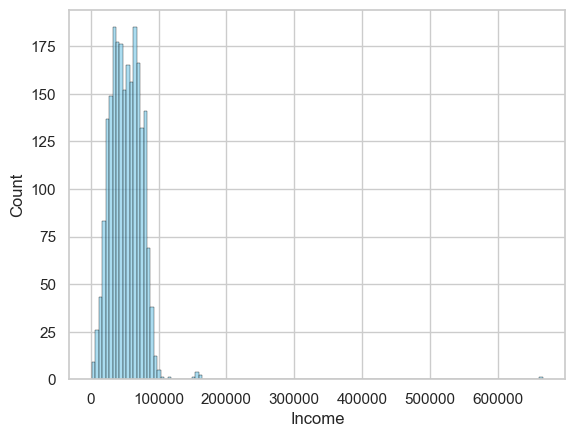

In [236]:
sns.histplot(data=df, 
            x='Income',
            color='skyblue',
            edgecolor='black',
            alpha=0.7)

Income dan age memiliki outliers besar. Sehingga dierapkan pemotongan data (capping) untuk menjaga analisis tetap relevan

In [237]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 36)

**3.6 Drop Unnecessary Columns**

Drop data

In [238]:
df.drop(['ID', 'Year_Birth','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [239]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Age,Total_Spending,category_age,category_income,cmpcount,cmpstatus,Dt_Customer_Year
0,UnderGraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,1,57,1617,Mature,Medium Income,1,Yes,2012
1,UnderGraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,60,27,Mature,Low Income,0,No,2014
2,UnderGraduate,In Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,49,776,MiddleAge,High Income,0,No,2013
3,UnderGraduate,In Relationship,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,30,53,Young,Very Low Income,0,No,2014
4,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,33,422,Young,Medium Income,0,No,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,UnderGraduate,In Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,47,1341,MiddleAge,Medium Income,0,No,2013
2236,PhD,In Relationship,64014.0,2,1,2014-06-10,56,406,0,30,...,0,0,0,68,444,Senior,Medium Income,1,Yes,2014
2237,UnderGraduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,33,1241,Young,Medium Income,1,Yes,2014
2238,Master,In Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,58,843,Mature,High Income,0,No,2014


In [240]:
cleaned_file_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)

## **Section 4. Analytics**

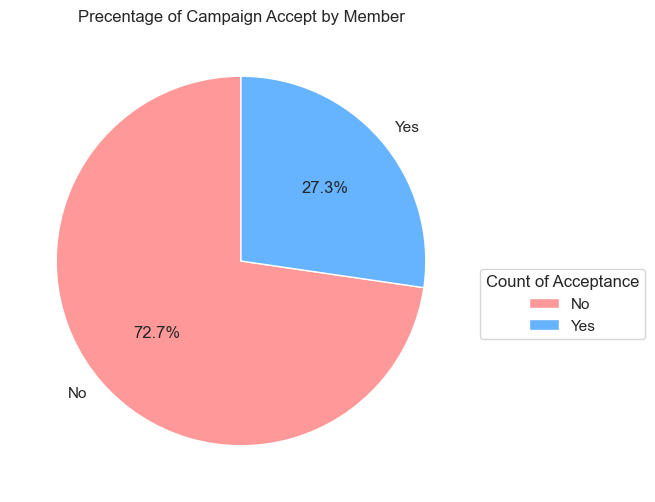

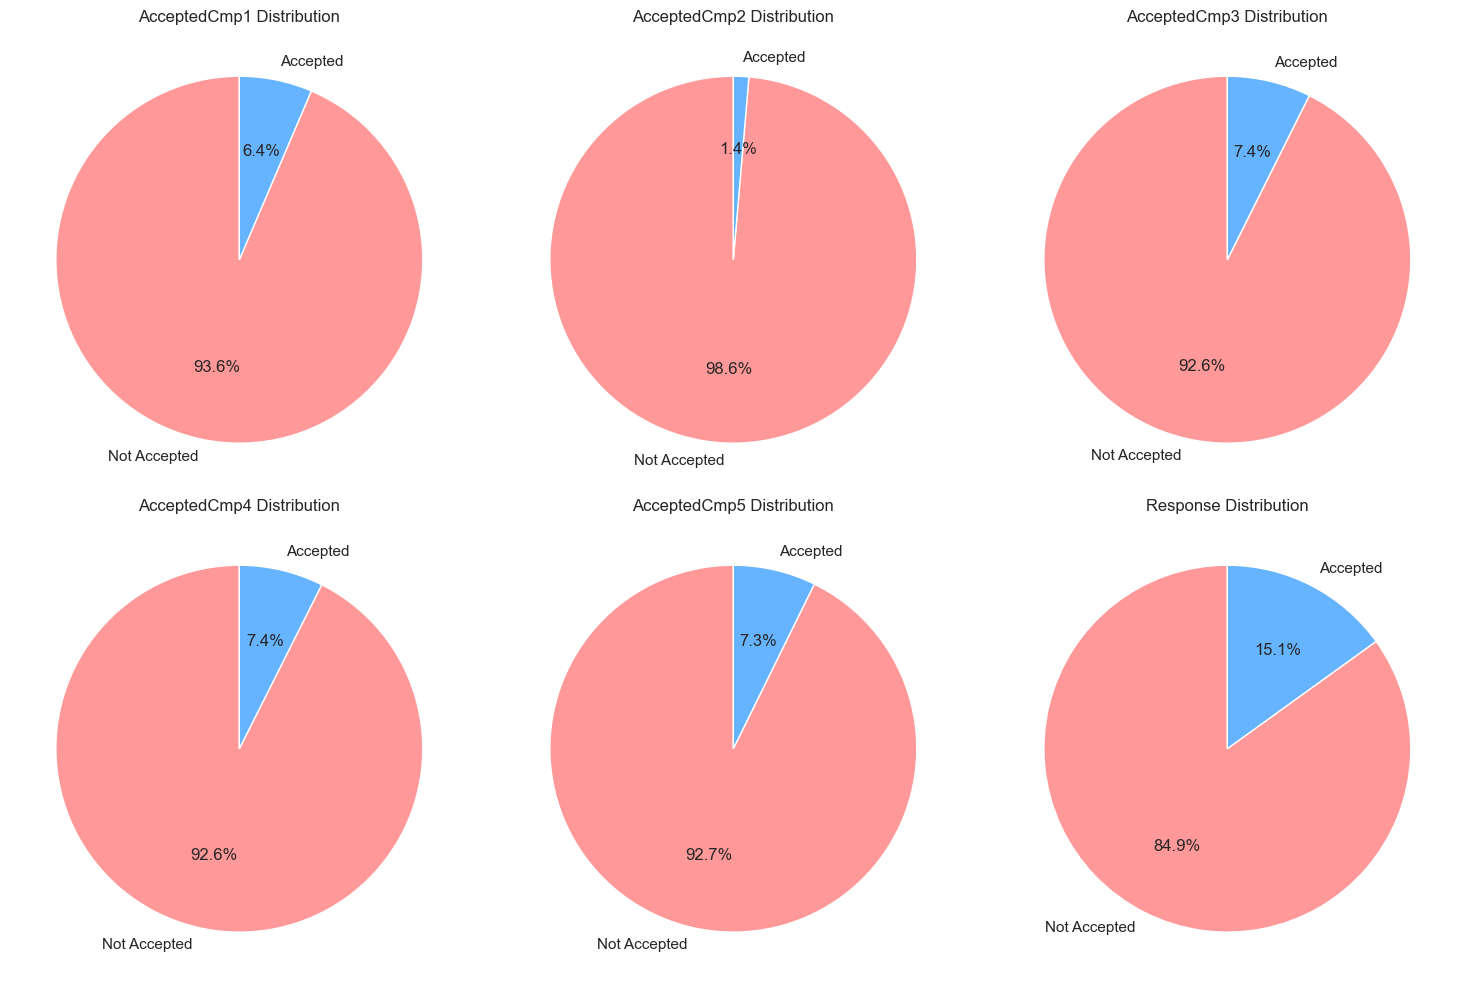

In [241]:
category_counts = df['cmpstatus'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct=lambda p: '{:.1f}%'.format(p) if p > 3 else '',
        startangle=90, 
        colors=[ '#ff9999', '#66b3ff'])

plt.title('Precentage of Campaign Accept by Member')
plt.legend(title="Count of Acceptance", loc="upper left", bbox_to_anchor=(1, 0.5))

# Define the variables to plot
variables = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create pie charts for each variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(variables):
    # Calculate value counts
    counts = df[var].value_counts(normalize=True)
    labels = counts.index.map({1: 'Accepted', 0: 'Not Accepted'})
    sizes = counts.values

    # Plot pie chart
    ax = axes[i // 3, i % 3]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=[ '#ff9999', '#66b3ff'])
    ax.set_title(f'{var} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

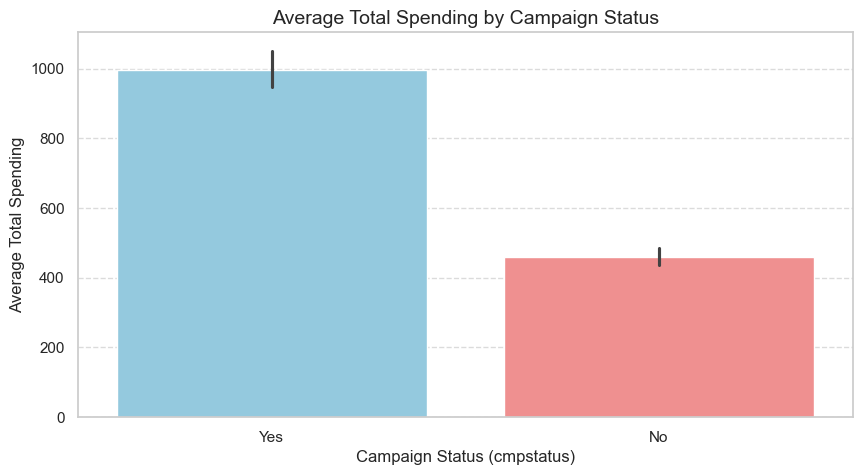

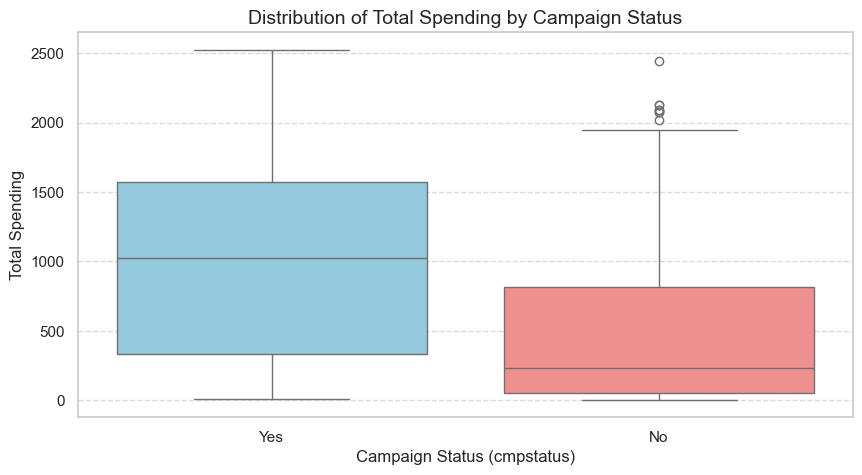

('Mann-Whitney U Test',
 np.float64(715386.0),
 np.float64(4.570515541619499e-66))

In [242]:
# Create bar chart for average Total_Spending by cmpstatus
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='cmpstatus', y='Total_Spending', palette=['#87ceeb', '#ff8080'])
plt.title('Average Total Spending by Campaign Status', fontsize=14)
plt.xlabel('Campaign Status (cmpstatus)', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create box plot for Total_Spending by cmpstatus
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cmpstatus', y='Total_Spending', palette=['#87ceeb', '#ff8080'])
plt.title('Distribution of Total Spending by Campaign Status', fontsize=14)
plt.xlabel('Campaign Status (cmpstatus)', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Split data into two groups based on cmpstatus
group_yes = df[df['cmpstatus'] == 'Yes']['Total_Spending']
group_no = df[df['cmpstatus'] == 'No']['Total_Spending']

# Perform normality tests (Shapiro-Wilk)
from scipy.stats import shapiro

normal_yes = shapiro(group_yes)
normal_no = shapiro(group_no)

# Select test based on normality results
if normal_yes.pvalue > 0.05 and normal_no.pvalue > 0.05:
    # Perform independent t-test
    test_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Welch's t-test
    test_type = "T-test (independent, Welch's)"
else:
    # Perform Mann-Whitney U test
    test_stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    test_type = "Mann-Whitney U Test"

test_type, test_stat, p_value

Dengan p-value yang jauh lebih kecil dari 0.05, kita menolak hipotesis nol (H₀) dan menyimpulkan bahwa terdapat perbedaan signifikan dalam Total_Spending antara grup dengan cmpstatus "Yes" dan "No"

### **4.1 Pertanyaan 1: Karakteristik Pelanggan yang Tidak Terpapar Kampanye**

Tujuan: Mengidentifikasi karakteristik demografis pelanggan yang belum pernah terpapar kampanye promosi untuk merancang strategi pemasaran yang lebih efektif.

#### Visualisasi dan Uji Hipotesis

<Figure size 1200x700 with 0 Axes>

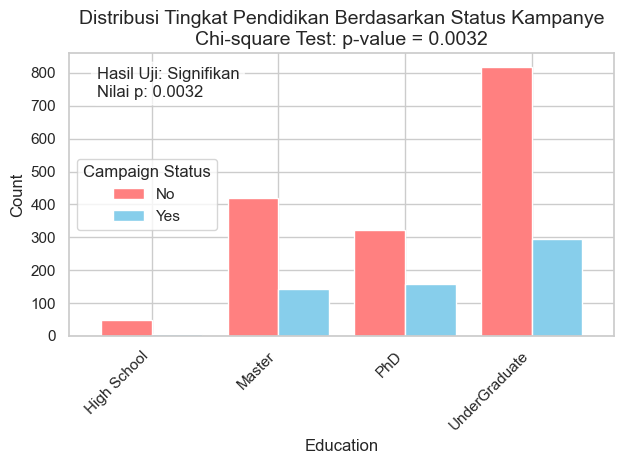


Analisis Statistik untuk Education:
Uji Chi-square: 13.8253
Derajat Kebebasan: 3
Nilai p: 0.0032
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus       No  Yes
Education              
High School     47    7
Master         419  144
PhD            323  157
UnderGraduate  819  296

Nilai Ekspektasi:
cmpstatus              No         Yes
Education                            
High School     39.254973   14.745027
Master         409.269439  153.730561
PhD            348.933092  131.066908
UnderGraduate  810.542495  304.457505


<Figure size 1200x700 with 0 Axes>

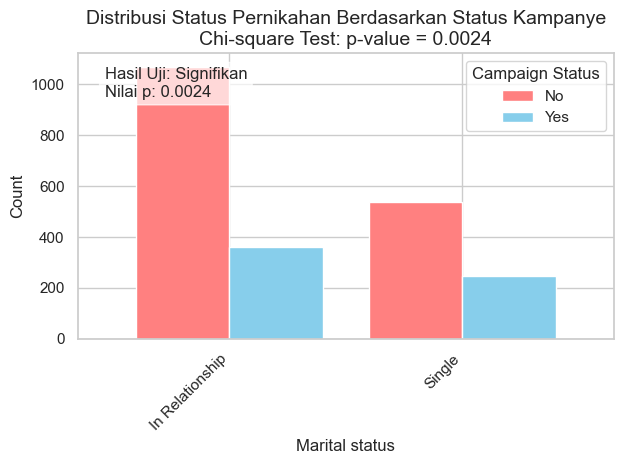


Analisis Statistik untuk Marital_Status:
Uji Chi-square: 9.2134
Derajat Kebebasan: 1
Nilai p: 0.0024
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus          No  Yes
Marital_Status            
In Relationship  1069  359
Single            539  245

Nilai Ekspektasi:
cmpstatus                 No         Yes
Marital_Status                          
In Relationship  1038.075949  389.924051
Single            569.924051  214.075949


<Figure size 1200x700 with 0 Axes>

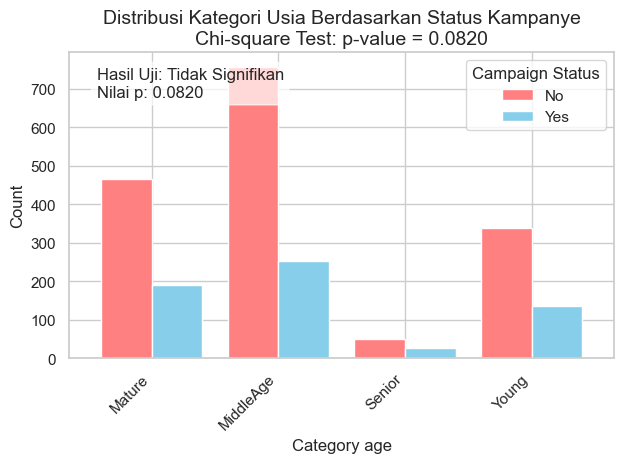


Analisis Statistik untuk category_age:
Uji Chi-square: 6.7034
Derajat Kebebasan: 3
Nilai p: 0.0820
Kesimpulan: Tidak terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus      No  Yes
category_age          
Mature        465  190
MiddleAge     757  252
Senior         49   27
Young         337  135

Nilai Ekspektasi:
cmpstatus             No         Yes
category_age                        
Mature        476.148282  178.851718
MiddleAge     733.486438  275.513562
Senior         55.247740   20.752260
Young         343.117541  128.882459


<Figure size 1200x700 with 0 Axes>

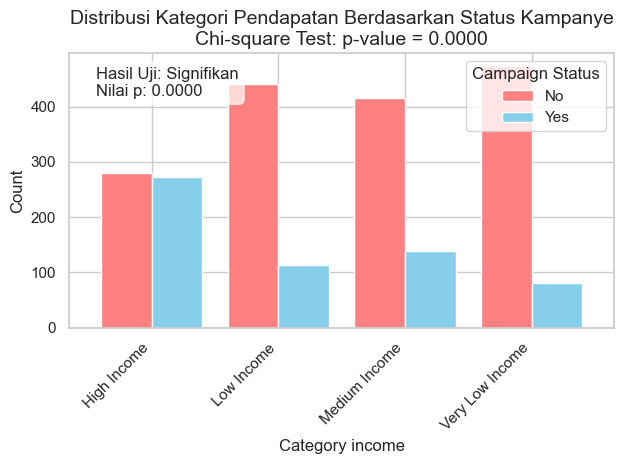


Analisis Statistik untuk category_income:
Uji Chi-square: 193.8277
Derajat Kebebasan: 3
Nilai p: 0.0000
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus         No  Yes
category_income          
High Income      280  272
Low Income       440  113
Medium Income    415  138
Very Low Income  473   81

Nilai Ekspektasi:
cmpstatus                No         Yes
category_income                        
High Income      401.273056  150.726944
Low Income       402.000000  151.000000
Medium Income    402.000000  151.000000
Very Low Income  402.726944  151.273056


<Figure size 1200x700 with 0 Axes>

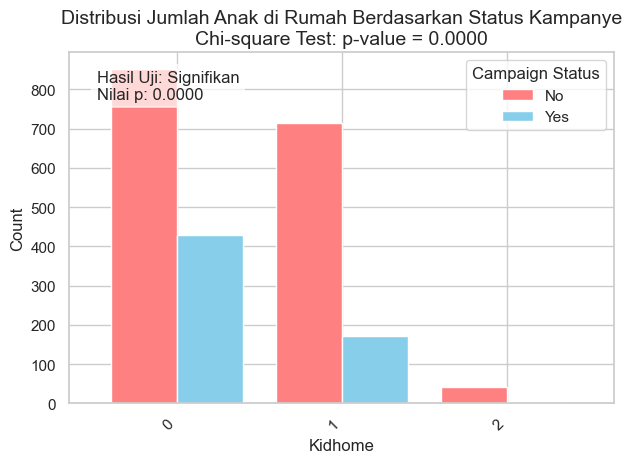


Analisis Statistik untuk Kidhome:
Uji Chi-square: 61.1217
Derajat Kebebasan: 2
Nilai p: 0.0000
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus   No  Yes
Kidhome            
0          852  429
1          714  171
2           42    4

Nilai Ekspektasi:
cmpstatus          No         Yes
Kidhome                          
0          931.215190  349.784810
1          643.345389  241.654611
2           33.439421   12.560579


<Figure size 1200x700 with 0 Axes>

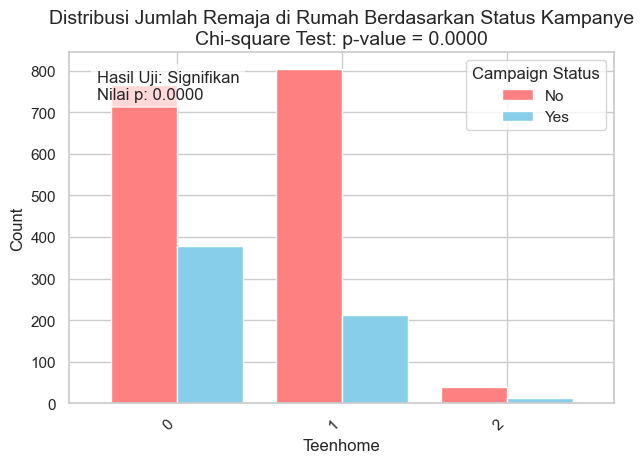


Analisis Statistik untuk Teenhome:
Uji Chi-square: 40.6486
Derajat Kebebasan: 2
Nilai p: 0.0000
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus   No  Yes
Teenhome           
0          765  379
1          804  213
2           39   12

Nilai Ekspektasi:
cmpstatus          No         Yes
Teenhome                         
0          831.623870  312.376130
1          739.301989  277.698011
2           37.074141   13.925859


<Figure size 1200x700 with 0 Axes>

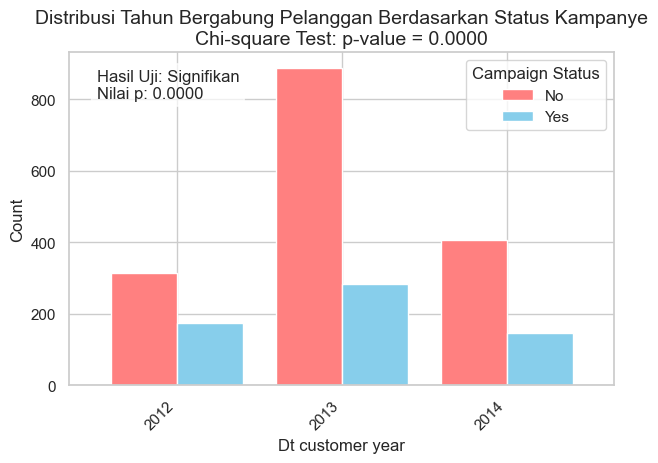


Analisis Statistik untuk Dt_Customer_Year:
Uji Chi-square: 23.3869
Derajat Kebebasan: 2
Nilai p: 0.0000
Kesimpulan: Terdapat hubungan signifikan antara variabel dan status kampanye

Tabel Kontingensi:
cmpstatus          No  Yes
Dt_Customer_Year          
2012              315  175
2013              887  283
2014              406  146

Nilai Ekspektasi:
cmpstatus                 No         Yes
Dt_Customer_Year                        
2012              356.202532  133.797468
2013              850.524412  319.475588
2014              401.273056  150.726944


In [ ]:
def plot_categorical_distribution(df, var, title_map):
    """
    Create a bar plot and perform Chi-square test for a categorical variable
    
    Parameters:
    - df: DataFrame containing the data
    - var: Categorical variable to analyze
    - title_map: Dictionary mapping variable names to plot titles
    """
    # Create contingency table
    contingency_table = pd.crosstab(df[var], df['cmpstatus'])
    
    # Perform Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Plot the distribution
    plt.figure(figsize=(12, 7))
    contingency_table.plot(kind='bar', stacked=False, color=['#ff8080','#87ceeb'], width=0.8)
    
    # Set title with statistical test results
    title = title_map.get(var, f'Distribusi {var.capitalize()} Berdasarkan Status Kampanye')
    plt.title(f'{title}\nChi-square Test: p-value = {p_value:.4f}', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(var.replace('_', ' ').capitalize(), fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Campaign Status')
    
    # Add statistical significance annotation
    significance_level = 0.05
    significance_text = 'Signifikan' if p_value < significance_level else 'Tidak Signifikan'
    plt.text(0.05, 0.95, f'Hasil Uji: {significance_text}\nNilai p: {p_value:.4f}', 
             transform=plt.gca().transAxes, 
             verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistical information
    print(f"\nAnalisis Statistik untuk {var}:")
    print(f"Uji Chi-square: {chi2:.4f}")
    print(f"Derajat Kebebasan: {dof}")
    print(f"Nilai p: {p_value:.4f}")
    print("Kesimpulan: " + 
          ("Terdapat hubungan signifikan" if p_value < significance_level else 
           "Tidak terdapat hubungan signifikan") + 
          " antara variabel dan status kampanye")
    print("\nTabel Kontingensi:")
    print(contingency_table)
    print("\nNilai Ekspektasi:")
    print(pd.DataFrame(expected, 
                       index=contingency_table.index, 
                       columns=contingency_table.columns))

# Gunakan fungsi untuk setiap variabel
categorical_vars = [
    'Education', 
    'Marital_Status', 
    'category_age', 
    'category_income', 
    'Kidhome', 
    'Teenhome', 
    'Dt_Customer_Year'
]

# Mapping judul plot dalam bahasa Indonesia
title_map = {
    'Education': 'Distribusi Tingkat Pendidikan Berdasarkan Status Kampanye',
    'Marital_Status': 'Distribusi Status Pernikahan Berdasarkan Status Kampanye',
    'category_age': 'Distribusi Kategori Usia Berdasarkan Status Kampanye',
    'category_income': 'Distribusi Kategori Pendapatan Berdasarkan Status Kampanye',
    'Kidhome': 'Distribusi Jumlah Anak di Rumah Berdasarkan Status Kampanye',
    'Teenhome': 'Distribusi Jumlah Remaja di Rumah Berdasarkan Status Kampanye',
    'Dt_Customer_Year': 'Distribusi Tahun Bergabung Pelanggan Berdasarkan Status Kampanye'
}

# Lakukan analisis untuk setiap variabel
for var in categorical_vars:
    plot_categorical_distribution(df, var, title_map)

#### Temuan Kunci
- Promotion campaign sangat dipengaruhi oleh karakteristik demografis
- Faktor-faktor yang berpengaruh pada terpapar atau tidaknya customer terpapar promotion campaign adalah Tingkat Pendidikan (Education), Status Pernikahan (Status_Marital), Pendapatan (Income), Jumlah Anak di Rumah (KidHome), Jumlah Remaja di Rumah, dan Tahun Bergabung Pelanggan
- Pelanggan Tidak Terpapar: Mayoritas adalah tingkat pendidikan UnderGraduate, berstatus In-Relationship memiliki anak dan remaja di rumah, dengan pendapatan sangat rendah, dan terdaftar di Supermarket X pada tahun 2013.

#### Rekomendasi Strategis
- Kembangkan kampanye promosi khusus untuk pelanggan berpendidikan UnderGraduate
- Desain program loyalitas yang menarik bagi pelanggan berstatus In-Relationship dengan struktur keluarga memiliki anak dan remaja
- Susun penawaran produk yang sesuai dengan kondisi ekonomi pelanggan berpenghasilan rendah
- Pertimbangkan memberikan penawaran khusus pada pelanggan yang sudah berlangganan satu tahun atau lebih


### **4.2  Pertanyaan 2: Preferensi Produk Pelanggan yang Tidak Terpapar**

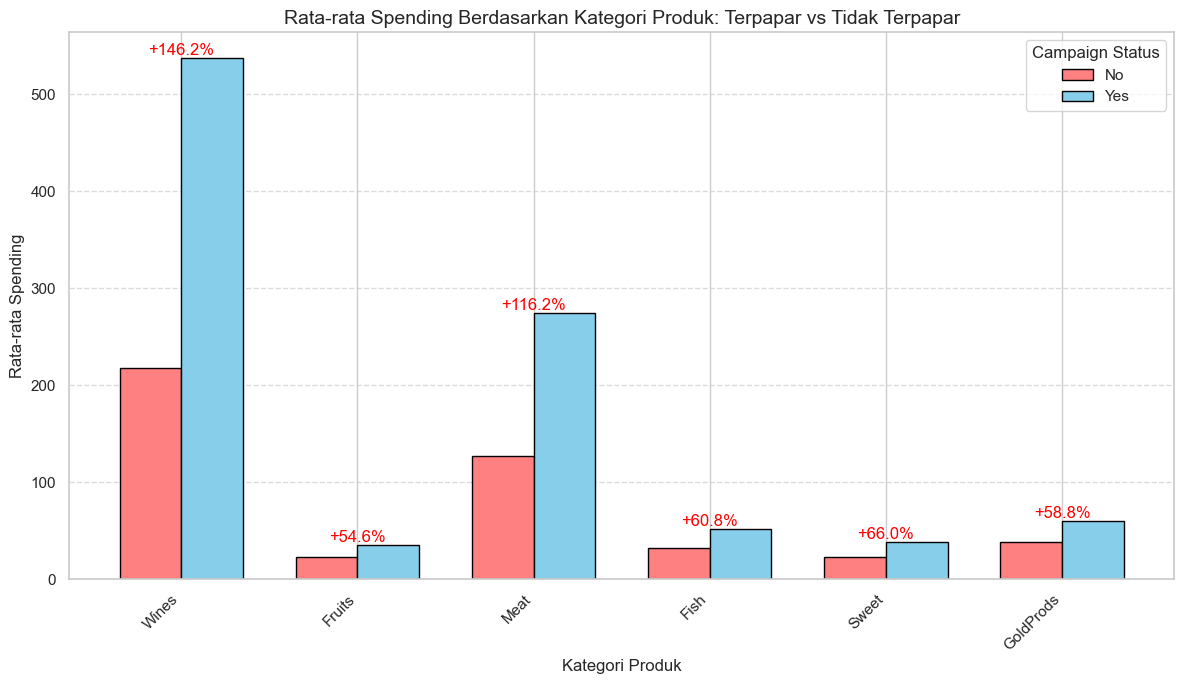


Analisis Rata-rata Spending Berdasarkan Paparan Kampanye:

Rata-rata Spending:
           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Exposed                                                            
0        218.184701  22.911070       126.804104        32.290423   
1        537.177152  35.430464       274.120861        51.913907   

         MntSweetProducts  MntGoldProds  
Exposed                                  
0               22.918532     37.851368  
1               38.036424     60.097682  

Persentase Perbedaan:
MntWines: +146.2%
MntFruits: +54.6%
MntMeatProducts: +116.2%
MntFishProducts: +60.8%
MntSweetProducts: +66.0%
MntGoldProds: +58.8%


In [277]:
def plot_spending_by_exposure(df, ad_exposure_columns, product_columns):
    """
    Membuat grafik perbandingan rata-rata spending berdasarkan paparan kampanye
    
    Parameters:
    - df: DataFrame yang berisi data
    - ad_exposure_columns: Kolom-kolom yang menunjukkan paparan kampanye
    - product_columns: Kolom-kolom produk untuk analisis spending
    """
    # Buat kolom untuk mengklasifikasikan paparan (1 jika terpapar kampanye, 0 jika tidak)
    df['Exposed'] = df[ad_exposure_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
    
    # Hitung rata-rata spending untuk setiap produk berdasarkan paparan
    average_spending = df.groupby('Exposed')[product_columns].mean()
    
    # Hitung persentase perbedaan
    percentage_difference = ((average_spending.loc[1] - average_spending.loc[0]) / average_spending.loc[0]) * 100
    
    # Buat grafik batang berkelompok
    plt.figure(figsize=(12, 7))
    
    # Persiapan untuk grafik batang berkelompok
    bar_width = 0.35
    index = np.arange(len(product_columns))
    
    # Plot batang untuk kelompok tidak terpapar
    plt.bar(index - bar_width/2, average_spending.loc[0], bar_width, 
            label='No', color='#ff8080', edgecolor='black')
    
    # Plot batang untuk kelompok terpapar
    plt.bar(index + bar_width/2, average_spending.loc[1], bar_width, 
            label='Yes', color='#87ceeb', edgecolor='black')
    
    # Kustomisasi plot
    title = 'Rata-rata Spending Berdasarkan Kategori Produk: Terpapar vs Tidak Terpapar'
    plt.title(title, fontsize=14)
    plt.xlabel('Kategori Produk', fontsize=12)
    plt.ylabel('Rata-rata Spending', fontsize=12)
    plt.xticks(index, [col.replace('Mnt', '').replace('Products', '') for col in product_columns], 
               rotation=45, ha='right')
    plt.legend(title='Campaign Status')  # Sesuaikan judul legend
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tambahkan label persentase perbedaan di atas grafik
    for i, diff in enumerate(percentage_difference):
        plt.text(index[i], max(average_spending.loc[0][i], average_spending.loc[1][i]), 
                 f'+{diff:.1f}%', ha='center', va='bottom', color='red')
    
    plt.tight_layout()
    plt.show()
    
    # Cetak informasi detail
    print("\nAnalisis Rata-rata Spending Berdasarkan Paparan Kampanye:")
    print("\nRata-rata Spending:")
    print(average_spending)
    print("\nPersentase Perbedaan:")
    for col, diff in zip(product_columns, percentage_difference):
        print(f"{col}: +{diff:.1f}%")

# Definisikan kolom-kolom yang relevan
ad_exposure_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Jalankan fungsi visualisasi
plot_spending_by_exposure(df, ad_exposure_columns, product_columns)

#### Temuan Kunci
- Wine dan Meat Products adalah kategori dengan peningkatan pengeluaran terbesar, menunjukkan potensi keuntungan tinggi jika dijadikan fokus kampanye.
- Produk seperti Gold Products dan Sweet Products menunjukkan potensi untuk meningkatkan daya tarik kampanye.
- Fruits dan Fish Products memiliki peningkatan moderat tetapi dapat dimaksimalkan dengan strategi promosi yang lebih kreatif.

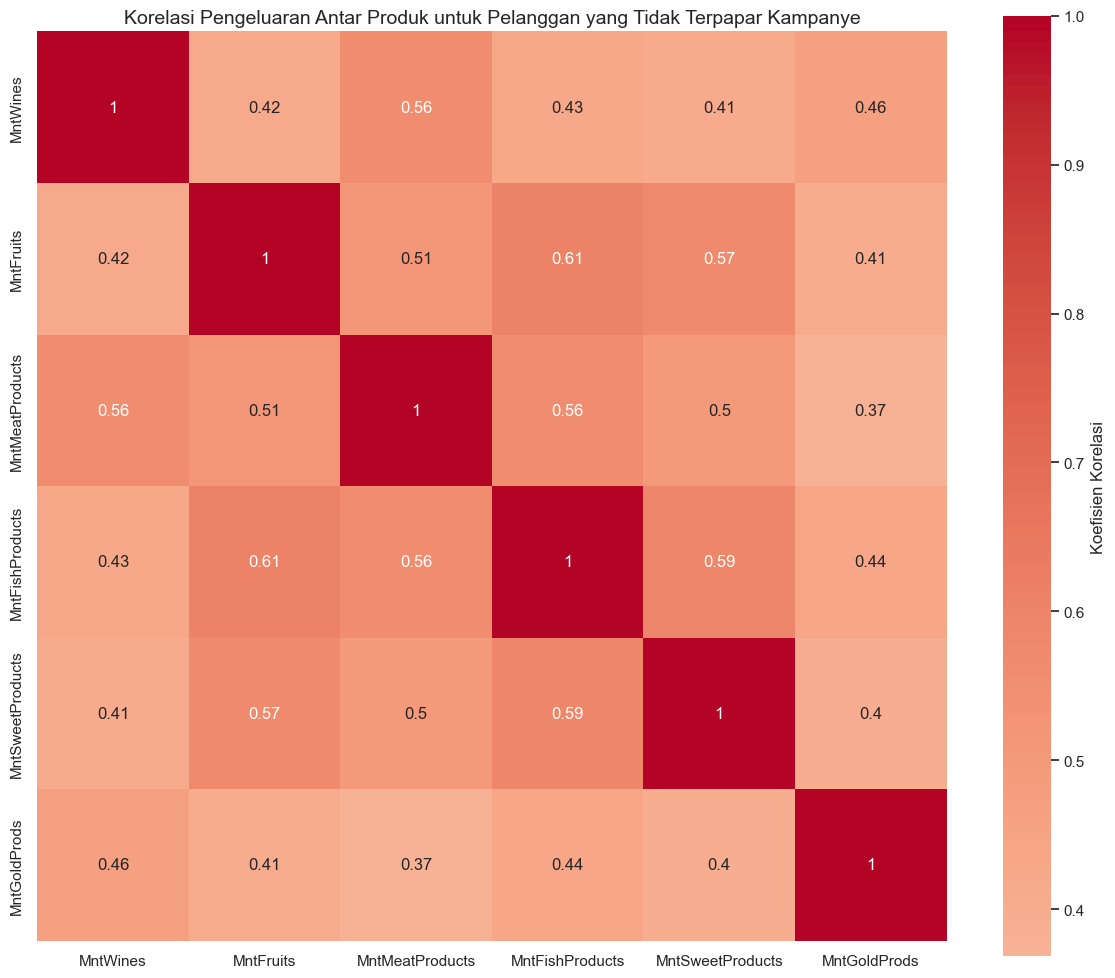


Analisis Korelasi Pengeluaran Produk untuk Pelanggan yang Tidak Terpapar Kampanye:

Matriks Korelasi:
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines          1.000000   0.416740         0.557451         0.426595   
MntFruits         0.416740   1.000000         0.514385         0.607514   
MntMeatProducts   0.557451   0.514385         1.000000         0.559531   
MntFishProducts   0.426595   0.607514         0.559531         1.000000   
MntSweetProducts  0.408026   0.572045         0.498033         0.589110   
MntGoldProds      0.462382   0.407444         0.368274         0.437189   

                  MntSweetProducts  MntGoldProds  
MntWines                  0.408026      0.462382  
MntFruits                 0.572045      0.407444  
MntMeatProducts           0.498033      0.368274  
MntFishProducts           0.589110      0.437189  
MntSweetProducts          1.000000      0.399287  
MntGoldProds              0.399287      1.000000  

Korelasi Tert

In [276]:
def plot_product_correlation(df, product_columns, campaign_status):
    """
    Membuat matriks korelasi pengeluaran antar produk berdasarkan status kampanye
    
    Parameters:
    - df: DataFrame yang berisi data
    - product_columns: Kolom-kolom produk untuk analisis korelasi
    - campaign_status: Status kampanye (0 atau 1)
    """
    # Filter DataFrame berdasarkan status kampanye
    filtered_df = df[df['Exposed'] == campaign_status]
    
    # Hitung matriks korelasi
    correlation_matrix = filtered_df[product_columns].corr()
    
    # Buat plot heatmap
    plt.figure(figsize=(12, 10))
    
    # Plot heatmap dengan annotasi
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                cbar_kws={'label': 'Koefisien Korelasi'})
    
    # Judul dan label
    status_text = 'Tidak Terpapar' if campaign_status == 0 else 'Terpapar'
    plt.title(f'Korelasi Pengeluaran Antar Produk untuk Pelanggan yang {status_text} Kampanye', 
              fontsize=14)
    
    
    plt.tight_layout()
    plt.show()
    
    # Cetak informasi detail korelasi
    print(f"\nAnalisis Korelasi Pengeluaran Produk untuk Pelanggan yang {status_text} Kampanye:")
    print("\nMatriks Korelasi:")
    print(correlation_matrix)
    
    # Temukan pasangan korelasi tertinggi dan terendah
    correlation_pairs = []
    for i in range(len(product_columns)):
        for j in range(i+1, len(product_columns)):
            correlation_pairs.append((
                product_columns[i], 
                product_columns[j], 
                correlation_matrix.iloc[i, j]
            ))
    
    # Urutkan pasangan korelasi
    correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print("\nKorelasi Tertinggi:")
    for prod1, prod2, corr in correlation_pairs_sorted[:3]:
        print(f"{prod1} - {prod2}: {corr:.4f}")
    print("\nKorelasi Terendah:")
    for prod1, prod2, corr in correlation_pairs_sorted[-3:]:
        print(f"{prod1} - {prod2}: {corr:.4f}")

# Definisikan kolom produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Buat kolom paparan kampanye jika belum ada
df['Exposed'] = df[ad_exposure_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Jalankan visualisasi untuk pelanggan tidak terpapar
plot_product_correlation(df, product_columns, 0)

#### Temuan Kunci
- Buah dan Ikan Sering Dibbeli Bersama Pelanggan yang membeli banyak buah cenderung juga membeli banyak ikan. Ini menunjukkan bahwa kedua jenis makanan ini sering dikonsumsi bersama-sama
- Produk Emas Kurang Terkait dengan Produk Lainnya: Produk emas (mungkin maksudnya produk premium atau mewah) tidak terlalu berhubungan dengan pembelian produk lainnya. Ini bisa jadi karena produk emas lebih bersifat impulsif atau ditujukan untuk segmen pelanggan yang berbeda.

#### Rekomendasi Strategis
- Lakukan Promosi Paket Hemat:
  - Kombinasi Buah dan Ikan: Buat paket yang menggabungkan buah-buahan segar dan berbagai jenis ikan dengan harga menarik.
  - Paket Makan Malam: Tawarkan paket yang terdiri dari daging atau ikan, sayuran, dan anggur untuk memudahkan pelanggan menyiapkan hidangan lengkap.


### **4.3 Pertanyaan Ketiga Saluran Distribusi yang Digunakan Oleh Yang Tidak Terpapar Campaign**

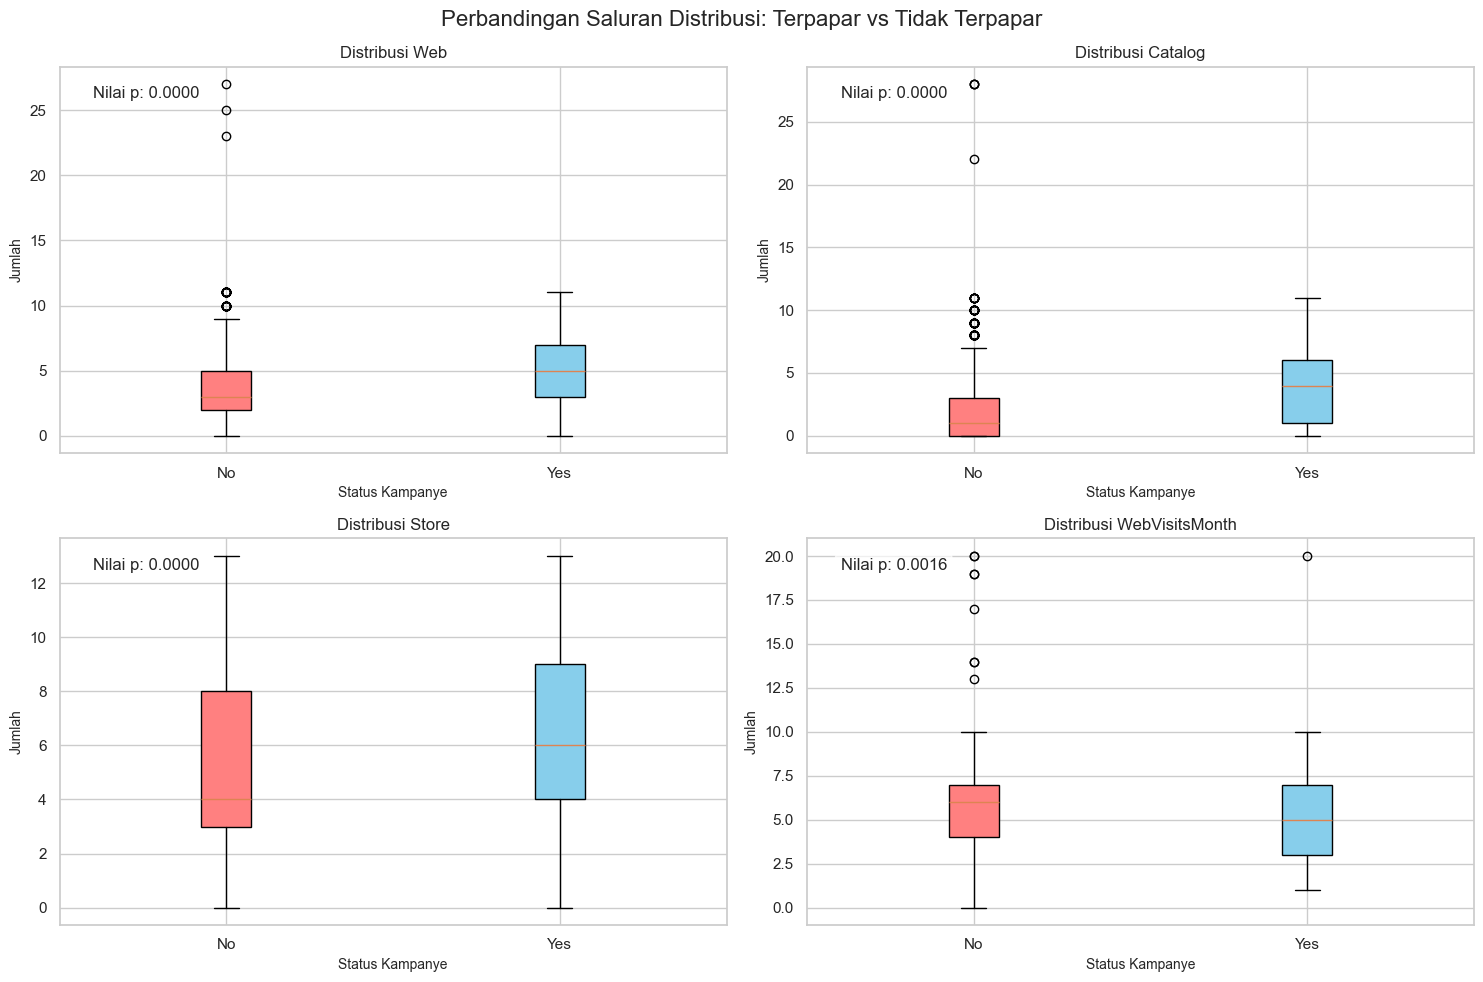


Analisis Statistik Saluran Distribusi:

NumWebPurchases:
Statistik t: -10.6461
Nilai p: 0.0000
Kesimpulan: Terdapat perbedaan signifikan antara kelompok terpapar dan tidak terpapar

NumCatalogPurchases:
Statistik t: -15.0783
Nilai p: 0.0000
Kesimpulan: Terdapat perbedaan signifikan antara kelompok terpapar dan tidak terpapar

NumStorePurchases:
Statistik t: -7.1384
Nilai p: 0.0000
Kesimpulan: Terdapat perbedaan signifikan antara kelompok terpapar dan tidak terpapar

NumWebVisitsMonth:
Statistik t: 3.1572
Nilai p: 0.0016
Kesimpulan: Terdapat perbedaan signifikan antara kelompok terpapar dan tidak terpapar


In [278]:
def plot_distribution_channels(df, distribution_channels):
    """
    Membuat visualisasi box plot untuk perbandingan saluran distribusi 
    berdasarkan status kampanye
    
    Parameters:
    - df: DataFrame yang berisi data
    - distribution_channels: Daftar kolom saluran distribusi untuk dianalisis
    """
    # Bagi data menjadi dua kelompok
    campaign_data = df[df['cmpstatus'] == 'Yes']
    non_campaign_data = df[df['cmpstatus'] == 'No']
    
    # Buat plot
    plt.figure(figsize=(15, 10))

    # Lakukan uji statistik untuk setiap saluran distribusi
    statistical_results = {}

    for i, channel in enumerate(distribution_channels, 1):
        plt.subplot(2, 2, i)
        
        # Data untuk box plot
        data_to_plot = [
            non_campaign_data[channel], 
            campaign_data[channel]
        ]
        
        # Lakukan uji statistik (t-test)
        t_stat, p_value = ttest_ind(non_campaign_data[channel], campaign_data[channel])
        statistical_results[channel] = {
            't_statistic': t_stat,
            'p_value': p_value
        }

        # Buat box plot
        bp = plt.boxplot(data_to_plot, patch_artist=True, 
                         labels=['No', 'Yes'])
        
        # Warna konsisten dengan visualisasi sebelumnya
        colors = ['#ff8080', '#87ceeb']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Judul dan label
        plt.title(f'Distribusi {channel.replace("Num", "").replace("Purchases", "")}', fontsize=12)
        plt.ylabel('Jumlah', fontsize=10)
        plt.xlabel('Status Kampanye', fontsize=10)
        
        # Tambahkan nilai p pada plot
        plt.text(0.05, 0.95, f'Nilai p: {p_value:.4f}', 
                 transform=plt.gca().transAxes, 
                 verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    # Judul utama
    plt.suptitle('Perbandingan Saluran Distribusi: Terpapar vs Tidak Terpapar', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Cetak informasi statistik detail
    print("\nAnalisis Statistik Saluran Distribusi:")
    for channel, results in statistical_results.items():
        print(f"\n{channel}:")
        print(f"Statistik t: {results['t_statistic']:.4f}")
        print(f"Nilai p: {results['p_value']:.4f}")
        print("Kesimpulan: " + 
              ("Terdapat perbedaan signifikan" if results['p_value'] < 0.05 else 
               "Tidak terdapat perbedaan signifikan") + 
              " antara kelompok terpapar dan tidak terpapar")

# Definisikan saluran distribusi
distribution_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Jalankan fungsi visualisasi
plot_distribution_channels(df, distribution_channels)

#### Temuan Kunci
- Pelanggan yang Terpapar: Lebih aktif melakukan pembelian melalui situs web, katalog, dan toko fisik. Ini menunjukkan bahwa kampanye berhasil mendorong pembelian lintas saluran.
- Pelanggan yang Tidak Terpapar: Lebih sering mengunjungi situs web tetapi cenderung tidak melakukan pembelian. Ini mengindikasikan potensi konversi yang belum optimal.

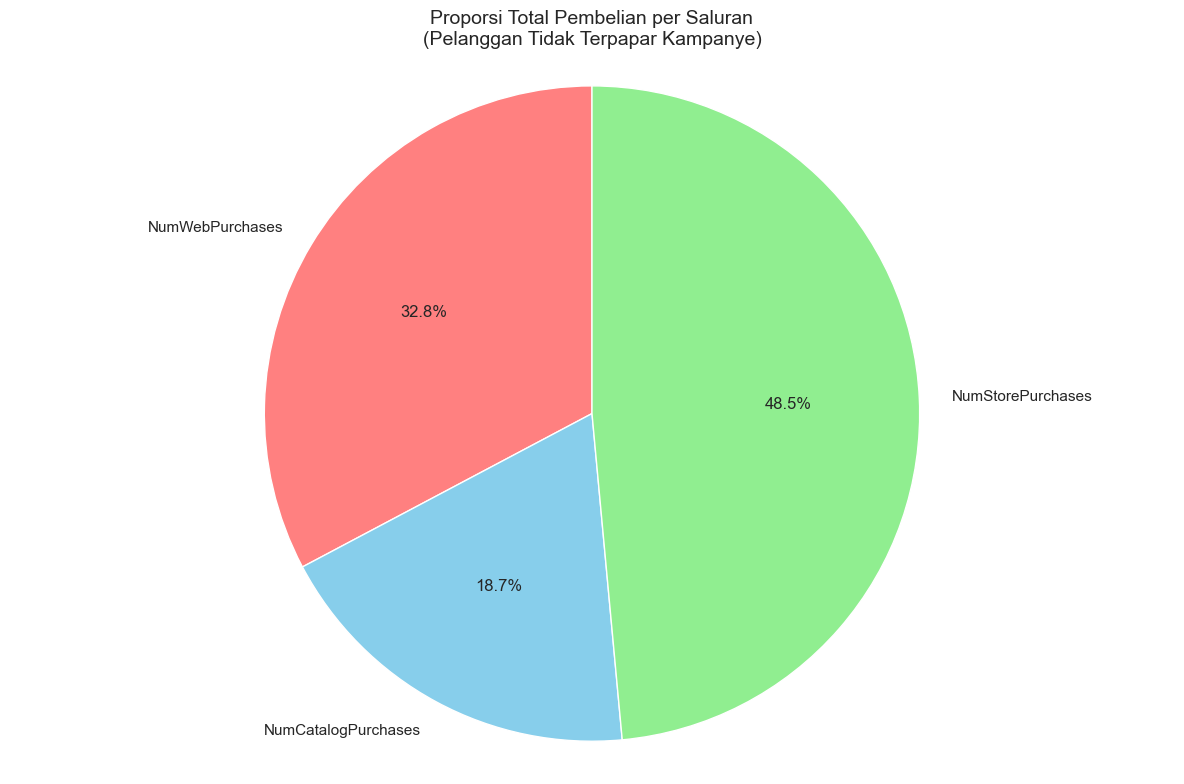


Analisis Proporsi Pembelian per Saluran:

Total Pembelian per Saluran:
NumWebPurchases: 5977 (32.8%)
NumCatalogPurchases: 3416 (18.7%)
NumStorePurchases: 8856 (48.5%)

Total Pembelian Keseluruhan: 18249


In [282]:
def plot_purchase_proportions(df, distribution_purchase):
    """
    Membuat visualisasi pie chart proporsi pembelian per saluran 
    untuk pelanggan yang tidak terpapar kampanye
    
    Parameters:
    - df: DataFrame yang berisi data
    - distribution_purchase: Daftar kolom saluran pembelian
    """
    # Filter data untuk pelanggan tidak terpapar
    non_campaign_data = df[df['cmpstatus'] == 'No']
    
    # Hitung total pembelian per saluran
    total_purchases = non_campaign_data[distribution_purchase].sum()
    
    # Hitung proporsi pembelian
    purchase_proportions = total_purchases / total_purchases.sum() * 100
    
    # Buat pie chart
    plt.figure(figsize=(12, 8))
    
    # Warna konsisten dengan visualisasi sebelumnya
    colors = ['#ff8080', '#87ceeb', '#90EE90']
    
    # Plot pie chart
    plt.pie(purchase_proportions, 
            labels=[col.replace('NumPurchases', '') for col in distribution_purchase], 
            autopct='%1.1f%%', 
            colors=colors, 
            startangle=90)
    
    # Judul dan kustomisasi
    plt.title('Proporsi Total Pembelian per Saluran\n(Pelanggan Tidak Terpapar Kampanye)', 
              fontsize=14)
    plt.axis('equal')
    
    
    plt.tight_layout()
    plt.show()
    
    # Cetak informasi detail
    print("\nAnalisis Proporsi Pembelian per Saluran:")
    print("\nTotal Pembelian per Saluran:")
    for channel, total in total_purchases.items():
        print(f"{channel.replace('NumPurchases', '')}: {total} ({purchase_proportions[channel]:.1f}%)")
    
    print("\nTotal Pembelian Keseluruhan:", total_purchases.sum())

# Definisikan saluran pembelian
distribution_purchase = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Jalankan fungsi visualisasi
plot_purchase_proportions(df, distribution_purchase)

#### Temuan Kunci
- Toko Fisik: Saluran utama dengan hampir separuh total pembelian. Tetap penting untuk menjadikan pengalaman belanja langsung sebagai prioritas.
- Situs Web: Memiliki potensi besar untuk pertumbuhan lebih lanjut, terutama melalui kampanye digital yang terarah.
- Katalog: Meski kontribusinya lebih kecil, katalog tetap relevan sebagai saluran pendukung, terutama untuk pelanggan yang kurang aktif secara digital.

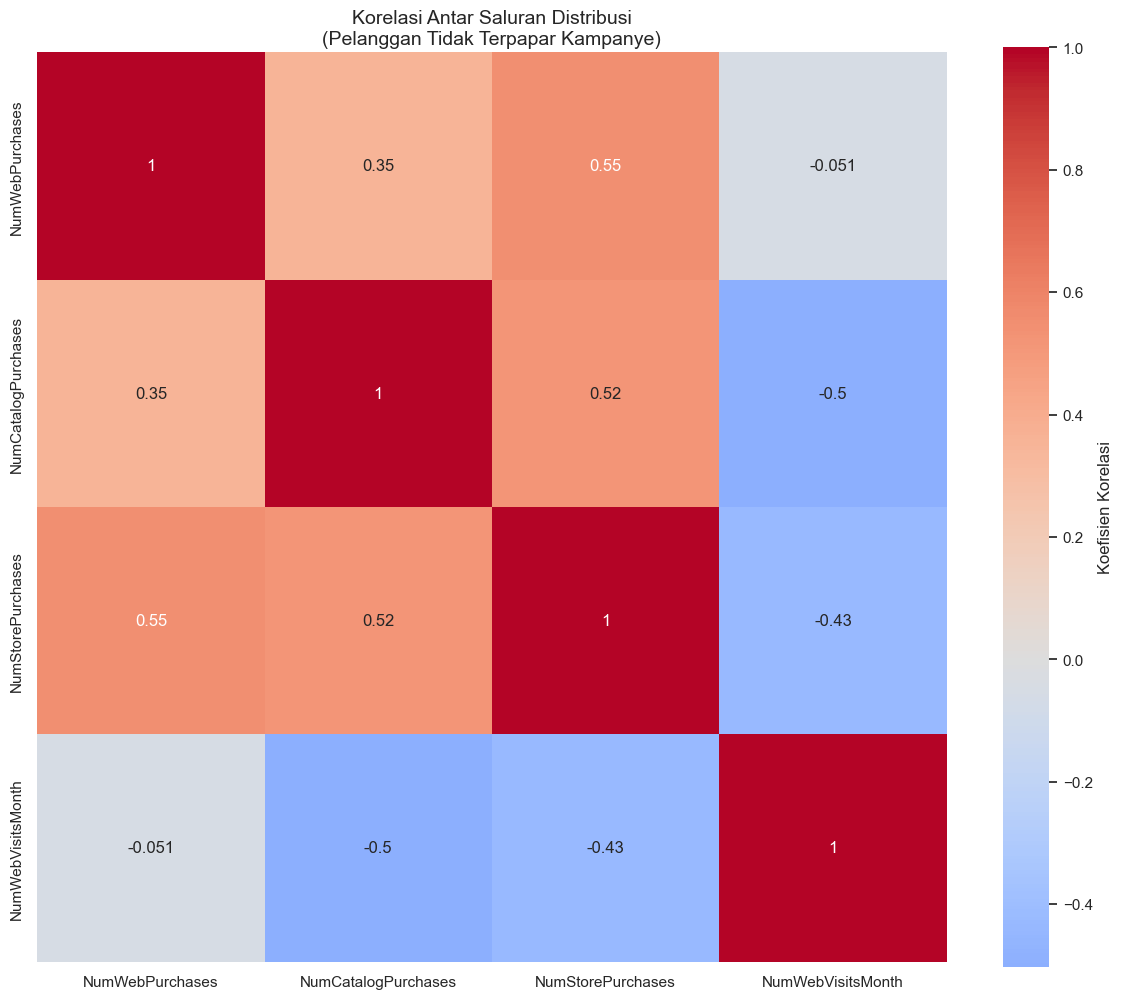


Analisis Korelasi Saluran Distribusi untuk Pelanggan Tidak Terpapar Kampanye:

Matriks Korelasi:
                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
NumWebPurchases             1.000000             0.352746           0.552632   
NumCatalogPurchases         0.352746             1.000000           0.519389   
NumStorePurchases           0.552632             0.519389           1.000000   
NumWebVisitsMonth          -0.050731            -0.502459          -0.429712   

                     NumWebVisitsMonth  
NumWebPurchases              -0.050731  
NumCatalogPurchases          -0.502459  
NumStorePurchases            -0.429712  
NumWebVisitsMonth             1.000000  

Korelasi Tertinggi:
Web - Store: 0.5526
Catalog - Store: 0.5194
Catalog - WebVisitsMonth: -0.5025


In [281]:
def plot_distribution_channel_correlation(df, distribution_channels):
    """
    Membuat matriks korelasi antar saluran distribusi untuk pelanggan yang tidak terpapar kampanye
    
    Parameters:
    - df: DataFrame yang berisi data
    - distribution_channels: Daftar kolom saluran distribusi untuk dianalisis
    """
    # Filter data untuk pelanggan tidak terpapar
    non_campaign_data = df[df['cmpstatus'] == 'No']
    
    # Hitung matriks korelasi
    channel_corr = non_campaign_data[distribution_channels].corr()
    
    # Buat plot
    plt.figure(figsize=(12, 10))
    
    # Plot heatmap dengan annotasi
    sns.heatmap(channel_corr, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                cbar_kws={'label': 'Koefisien Korelasi'})
    
    # Judul dan label
    plt.title('Korelasi Antar Saluran Distribusi\n(Pelanggan Tidak Terpapar Kampanye)', 
              fontsize=14)
    
    
    plt.tight_layout()
    plt.show()
    
    # Cetak informasi detail korelasi
    print("\nAnalisis Korelasi Saluran Distribusi untuk Pelanggan Tidak Terpapar Kampanye:")
    print("\nMatriks Korelasi:")
    print(channel_corr)
    
    # Temukan pasangan korelasi tertinggi dan terendah
    correlation_pairs = []
    for i in range(len(distribution_channels)):
        for j in range(i+1, len(distribution_channels)):
            correlation_pairs.append((
                distribution_channels[i], 
                distribution_channels[j], 
                channel_corr.iloc[i, j]
            ))
    
    # Urutkan pasangan korelasi
    correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print("\nKorelasi Tertinggi:")
    for ch1, ch2, corr in correlation_pairs_sorted[:3]:
        print(f"{ch1.replace('Num','').replace('Purchases','')} - {ch2.replace('Num','').replace('Purchases','')}: {corr:.4f}")

# Definisikan saluran distribusi
distribution_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Jalankan fungsi visualisasi
plot_distribution_channel_correlation(df, distribution_channels)

#### Temuan Kunci
1. Kekuatan Integrasi Lintas Saluran:
- Korelasi positif antara situs web, katalog, dan toko fisik menunjukkan peluang untuk meningkatkan sinergi antar saluran.
2. Hambatan pada Transisi Digital:
- Korelasi negatif antara katalog dan kunjungan situs web menunjukkan perlunya strategi untuk mengarahkan pelanggan katalog ke saluran online.
3. Peluang Digitalisasi:
- Pelanggan yang jarang menggunakan situs web dapat dimotivasi dengan kampanye personalisasi dan insentif khusus untuk memanfaatkan saluran digital.

## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

Kesimpulan dari Analisis yang Dilakukan:

1. Respons Kampanye Promosi:
- Pelanggan yang terpapar kampanye promosi (cmpstatus "Yes") memiliki pengeluaran total yang secara signifikan lebih tinggi dibandingkan yang tidak terpapar.
- Perbedaan ini terbukti signifikan secara statistik melalui uji Mann-Whitney U dengan p-value < 0,05.

2. Karakteristik Pelanggan Tidak Terpapar Kampanye:
- Sebagian besar pelanggan yang tidak terpapar adalah dari kelompok Single dan kategori pendapatan Very Low Income atau Low Income.
- Kelompok umur yang dominan adalah MiddleAge dan Young.

3. Preferensi Produk:
- Pelanggan yang terpapar cenderung menghabiskan lebih banyak untuk kategori produk seperti Wine dan Meat Products dibandingkan dengan yang tidak terpapar.

4. Saluran Distribusi:
- Pembelian melalui toko (Store Purchases) lebih mendominasi dibandingkan saluran lainnya untuk pelanggan yang tidak terpapar kampanye.
- Korelasi antar saluran distribusi menunjukkan hubungan positif yang kuat, khususnya antara pembelian melalui katalog dan situs web.

**5.2 Recommendation**

1. Peningkatan Eksposur Kampanye:
- Fokuskan kampanye pada kelompok demografis dengan kategori pendapatan Very Low Income dan Low Income. Pertimbangkan memberikan diskon atau promo spesifik untuk menarik perhatian kelompok ini.
- Gunakan media yang lebih mudah diakses oleh kelompok usia Young dan MiddleAge, seperti media sosial atau pesan instan.

2. Optimalisasi Saluran Distribusi:
- Tingkatkan pengalaman pelanggan di toko fisik dengan promosi berbasis lokasi untuk pelanggan yang belum pernah terekspos kampanye.
- Kembangkan strategi pembelian melalui katalog dan situs web untuk memperkuat interaksi multi-saluran.

3. Personalisasi Penawaran:
- Gunakan data pembelian sebelumnya untuk menawarkan produk yang relevan, seperti Wine dan Meat Products, yang lebih disukai pelanggan yang sudah terekspos.

4. Pengembangan Produk:
- Diversifikasi produk untuk memenuhi kebutuhan kelompok pelanggan yang tidak tertarik dengan kategori produk dominan, seperti menawarkan lebih banyak produk berbasis Fish atau Sweet Products.